In [1]:
import xarray # to open NetCDF files
import cartopy # to plot maps
import matplotlib
import matplotlib.pyplot as mp # for figure creation
import numpy
import cmocean

## import obs data

In [2]:
obs_precip_ds = xarray.open_dataset('../nc-files/obs/obs_GPCP_pr_1979-05_climatology_djf.nc')

## import CESM model data

In [3]:
model_precip_historical_ds = xarray.open_dataset('../nc-files/models/CESM1-CAM5_pr_1961-90_climatology_djf.nc')
model_precip_future_ds = xarray.open_dataset('../nc-files/models/CESM1-CAM5_pr_2070-99_climatology_djf.nc')

In [4]:
model_precip_diff = model_precip_future_ds - model_precip_historical_ds

## import CESM pvalue data

In [5]:
model_precip_pvals_ds = xarray.open_dataset('../nc-files/models/CESM1-CAM5_pr_2070-99_1961-90_pvals_djf.nc')

## create plot

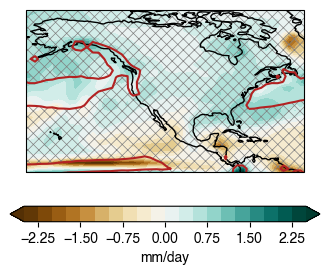

In [10]:
map_crs = cartopy.crs.PlateCarree()
data_crs = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(8,3))

ax = fig.add_subplot(111, projection=map_crs)
ax.set_extent([-170, -50, 5, 75], crs=cartopy.crs.PlateCarree())

contour_plot = ax.contourf(model_precip_diff['lon'].values,
                           model_precip_diff['lat'].values,
                           model_precip_diff['pr'].values,
                           cmap='BrBG',
                           levels=numpy.arange(-2.5,2.51,0.25),
                           extend='both',
                           transform=data_crs)

hatching_plot = ax.contourf(obs_precip_ds['lon'].values,
                          obs_precip_ds['lat'].values,
                          obs_precip_ds['pr'].values,
                            levels=[2.5,5], colors='None',
                            hatches=['xxx'], extend='min',
                            transform=data_crs)
#levels must be a list of at least 2, for hatching
#first level is the lower level of the hatching
#second level is the higher level
#using extend=max extends above the second contour
#using extend=min to hash below second contour

contour_line = ax.contour(obs_precip_ds['lon'].values,
                          obs_precip_ds['lat'].values,
                          obs_precip_ds['pr'].values,
                          levels=[5], colors=['firebrick'], linewidths=[1.5],
                          transform=data_crs)

mp.colorbar(contour_plot, location='bottom', label='mm/day', shrink=0.5)

ax.coastlines()

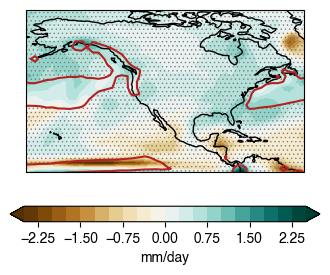

In [9]:
map_crs = cartopy.crs.PlateCarree()
data_crs = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(8,3))

ax = fig.add_subplot(111, projection=map_crs)
ax.set_extent([-170, -50, 5, 75], crs=cartopy.crs.PlateCarree())

contour_plot = ax.contourf(model_precip_diff['lon'].values,
                           model_precip_diff['lat'].values,
                           model_precip_diff['pr'].values,
                           cmap='BrBG',
                           levels=numpy.arange(-2.5,2.51,0.25),
                           extend='both',
                           transform=data_crs)

matplotlib.rc('hatch', color='0.5', linewidth=0.5)

hatching_plot = ax.contourf(obs_precip_ds['lon'].values,
                            obs_precip_ds['lat'].values,
                            obs_precip_ds['pr'].values,
                            levels=[2.5,5], colors='None',
                            hatches=['....'], extend='min',
                            transform=data_crs)
#levels must be a list of at least 2, for hatching
#first level is the lower level of the hatching
#second level is the higher level
#using extend=max extends above the second contour
#using extend=min to hash below second contour

contour_line = ax.contour(obs_precip_ds['lon'].values,
                          obs_precip_ds['lat'].values,
                          obs_precip_ds['pr'].values,
                          levels=[5], colors=['firebrick'], linewidths=[1.5],
                          transform=data_crs)

mp.colorbar(contour_plot, location='bottom', label='mm/day', shrink=0.5)

ax.coastlines()

mp.savefig('example-contour-plot.pdf', bbox_inches='tight')